# Captured From Bitalino

In [35]:
import os
import matplotlib.pyplot as plt
from bitalino import BITalino
import numpy as np
import pandas as pd 
from datetime import datetime, timedelta  # For UTC timestamps
from scipy.signal import welch
from scipy.signal import argrelextrema  # For finding local minima
from scipy.integrate import simps  # For numerical integration

### Configuring the Bitalino Device abd Capturing Data

In [ ]:
device_address = "98:D3:11:FD:1F:3A"  # BITalino's MAC address
sampling_rate = 100  # Recommended sampling rate for EEG
duration = 10  # Capture duration in seconds

try:
    # Connect to BITalino
    print("Connecting to BITalino...")
    device = BITalino(device_address)
    print("Connected!")

    # Start acquisition from channels A3 and A4 (indices 2 and 3)
    eeg_channels = [2, 3]  # Channels A3 and A4
    device.start(sampling_rate, eeg_channels)
    print(f"Capturing EEG data for {duration} seconds...")

    # Get the start time in UTC
    start_time_utc = datetime.utcnow()
    print(f"Acquisition started at {start_time_utc} UTC")

    # Lists to store data for saving and plotting
    eeg_data_list_a3 = []
    eeg_data_list_a4 = []
    time_list = []

    # Data acquisition loop
    for i in range(sampling_rate * duration):
        data = device.read(1)  # Read 1 sample at a time
        print(f"Raw data: {data}")  # Debugging output to confirm data format

        # Extract EEG signals from channels A3 and A4
        eeg_signal_a3 = data[0, -2]  # A3 channel
        eeg_signal_a4 = data[0, -1]  # A4 channel

        # Calculate the timestamp for the current sample in UTC
        current_time_utc = start_time_utc + timedelta(seconds=i / sampling_rate)

        # Store data for saving and plotting
        eeg_data_list_a3.append(eeg_signal_a3)
        eeg_data_list_a4.append(eeg_signal_a4)
        time_list.append(current_time_utc)

    # Stop acquisition
    device.stop()
    print("Data capture complete!")

    # Plot data for A3
    plt.figure(figsize=(24, 12))
    plt.plot(time_list, eeg_data_list_a3, color="blue", label="A3 Channel")
    plt.title("EEG Signal A3 Over Time")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Amplitude (μV)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot data for A4
    plt.figure(figsize=(24, 12))
    plt.plot(time_list, eeg_data_list_a4, color="green", label="A4 Channel")
    plt.title("EEG Signal A4 Over Time")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Amplitude (μV)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot both signals overlapped
    plt.figure(figsize=(24, 12))
    plt.plot(time_list, eeg_data_list_a3, color="blue", label="A3 Channel")
    plt.plot(time_list, eeg_data_list_a4, color="green", label="A4 Channel")
    plt.title("EEG Signals A3 and A4 Over Time (Overlapped)")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Amplitude (μV)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save data to CSV
    eeg_df = pd.DataFrame({
        "UTC Timestamp": time_list,
        "EEG Signal A3 (μV)": eeg_data_list_a3,
        "EEG Signal A4 (μV)": eeg_data_list_a4
    })
    csv_file = "eeg_data_a3_a4_utc.csv"
    eeg_df.to_csv(csv_file, index=False)
    print(f"Data saved to {csv_file}")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Cleanup
    if 'device' in locals():  # Close device only if it was initialized
        device.close()

# From a CSV

In [29]:
csv_file = "path"
data = pd.read_csv(csv_file)

# Parse the "UTC Timestamp" column as datetime
data['UTC Timestamp'] = pd.to_datetime(data['UTC Timestamp'])

# Display the first few rows
print("First few rows of the EEG data:")
data.head()  # Displays the first 5 rows

First few rows of the EEG data:


,UTC Timestamp,EEG Signal A3 (μV),EEG Signal A4 (μV)
0,2024-12-10 11:01:34.957784,430,481
1,2024-12-10 11:01:34.967784,435,469
2,2024-12-10 11:01:34.977784,515,521
3,2024-12-10 11:01:34.987784,484,496
4,2024-12-10 11:01:34.997784,471,496


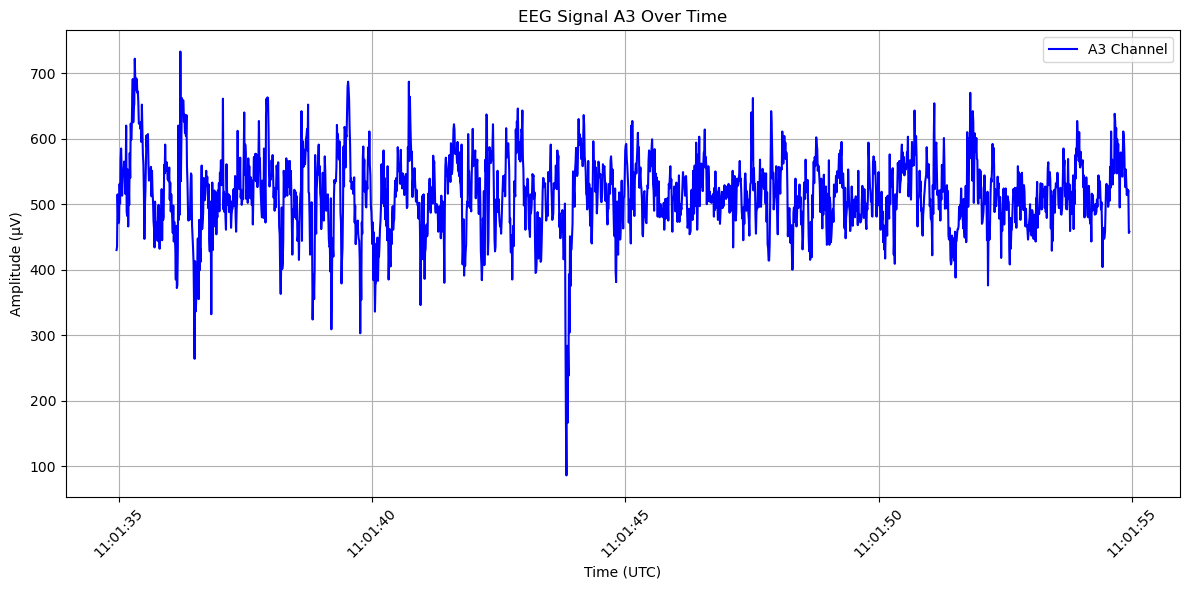

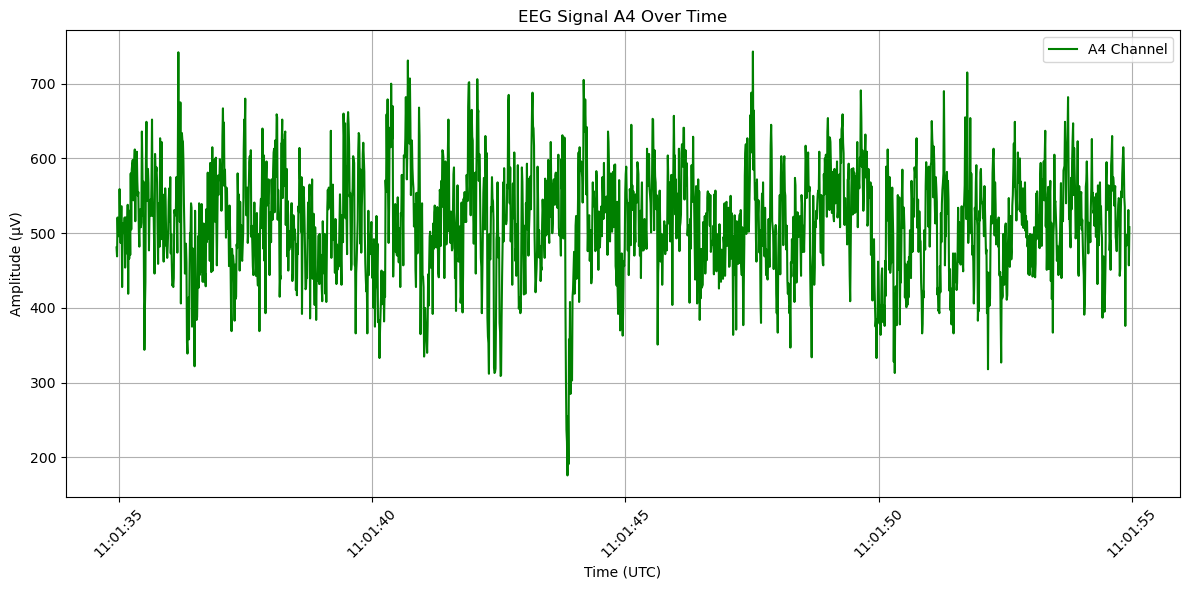

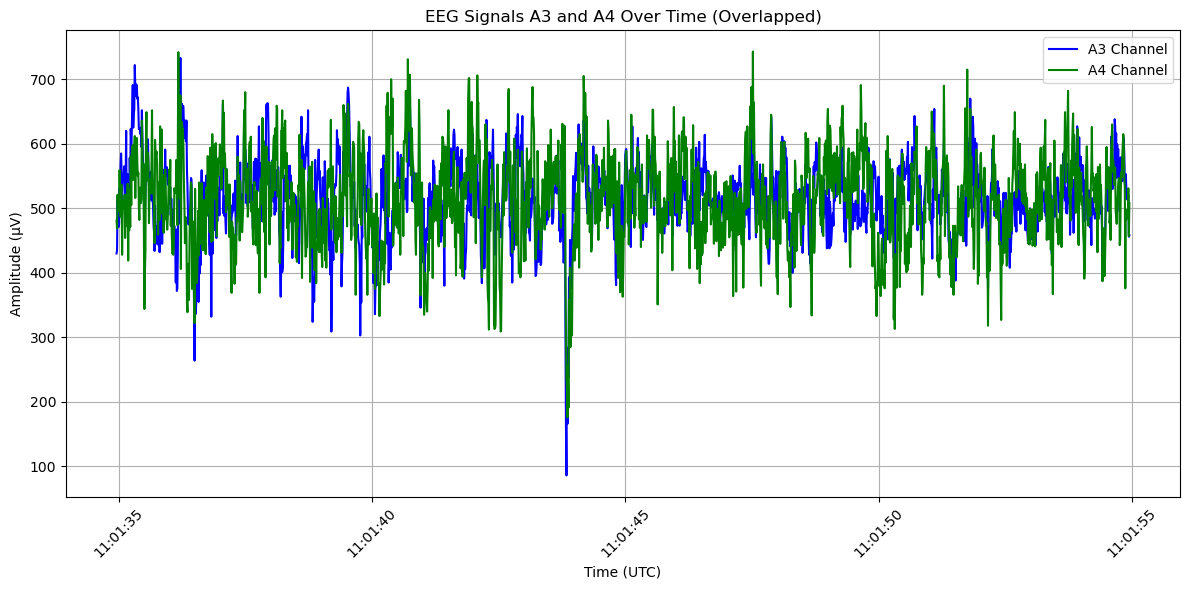

In [30]:
# Plot the A3 channel
plt.figure(figsize=(12, 6))
plt.plot(data['UTC Timestamp'], data['EEG Signal A3 (μV)'], color='blue', label='A3 Channel')
plt.title('EEG Signal A3 Over Time')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude (μV)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot the A4 channel
plt.figure(figsize=(12, 6))
plt.plot(data['UTC Timestamp'], data['EEG Signal A4 (μV)'], color='green', label='A4 Channel')
plt.title('EEG Signal A4 Over Time')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude (μV)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot both channels overlapped
plt.figure(figsize=(12, 6))
plt.plot(data['UTC Timestamp'], data['EEG Signal A3 (μV)'], color='blue', label='A3 Channel')
plt.plot(data['UTC Timestamp'], data['EEG Signal A4 (μV)'], color='green', label='A4 Channel')
plt.title('EEG Signals A3 and A4 Over Time (Overlapped)')
plt.xlabel('Time (UTC)')
plt.ylabel('Amplitude (μV)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Analysis (PSD Plot)

# dB / Hz

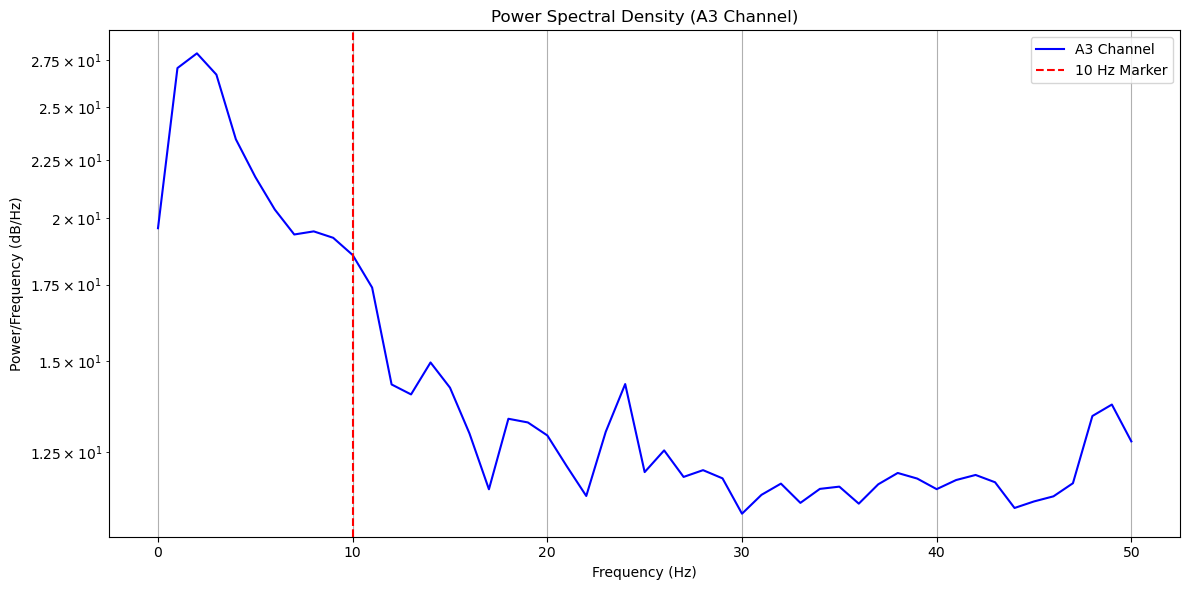

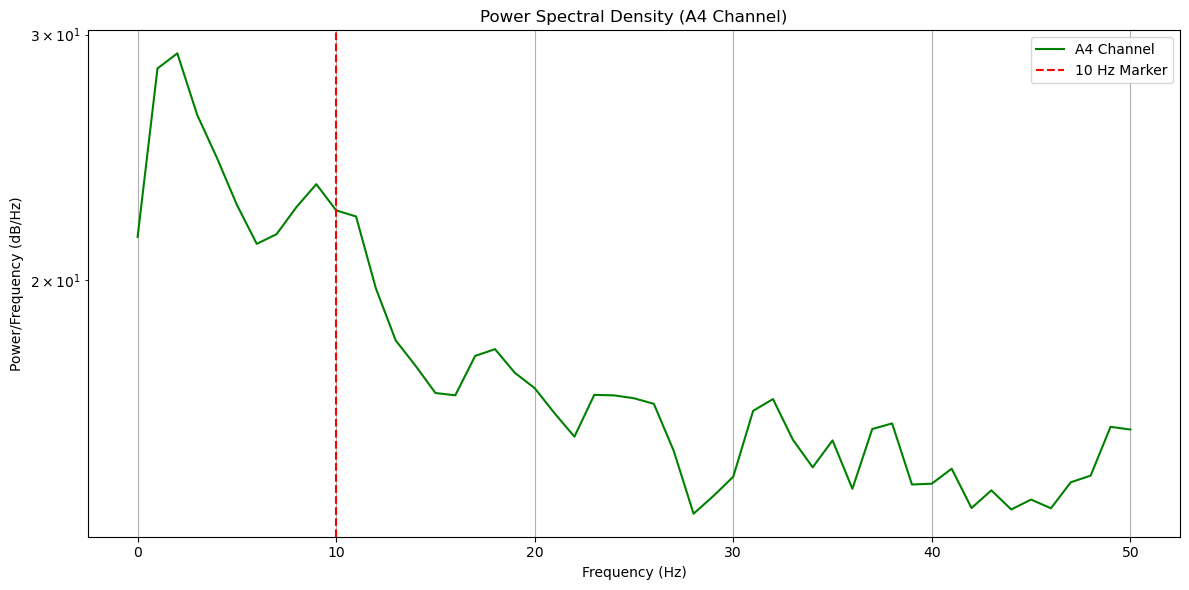

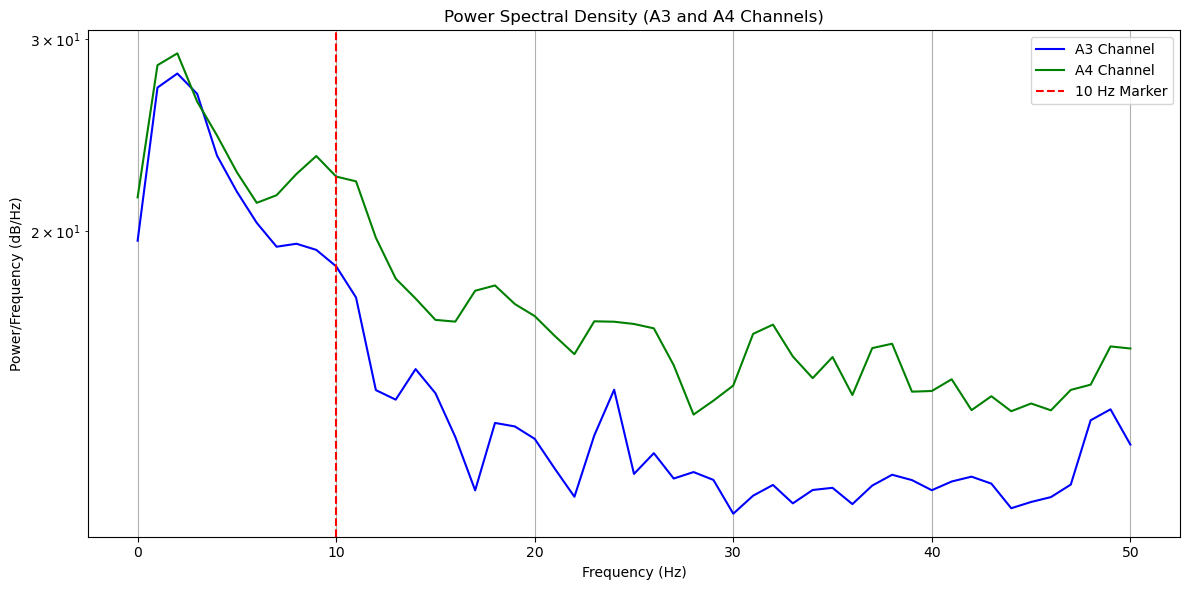

In [31]:
csv_file = "path"
data = pd.read_csv(csv_file)

# Parse the "UTC Timestamp" column as datetime
data['UTC Timestamp'] = pd.to_datetime(data['UTC Timestamp'])

# Sampling frequency (same as your acquisition rate)
fs = 100  # Hz

# Extract the EEG signals
eeg_signal_a3 = data['EEG Signal A3 (μV)']
eeg_signal_a4 = data['EEG Signal A4 (μV)']

# Compute PSD using Welch's method
f_a3, psd_a3 = welch(eeg_signal_a3, fs, nperseg=fs)
f_a4, psd_a4 = welch(eeg_signal_a4, fs, nperseg=fs)

# Convert PSD to log scale for better visualization
log_psd_a3 = 10 * np.log10(psd_a3)
log_psd_a4 = 10 * np.log10(psd_a4)

# Plot the PSD for A3
plt.figure(figsize=(12, 6))
plt.semilogy(f_a3, log_psd_a3, label="A3 Channel", color="blue")
plt.axvline(x=10, color='red', linestyle='--', label="10 Hz Marker")  # Mark 10 Hz
plt.title("Power Spectral Density (A3 Channel)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the PSD for A4
plt.figure(figsize=(12, 6))
plt.semilogy(f_a4, log_psd_a4, label="A4 Channel", color="green")
plt.axvline(x=10, color='red', linestyle='--', label="10 Hz Marker")  # Mark 10 Hz
plt.title("Power Spectral Density (A4 Channel)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot PSD for both channels overlapped
plt.figure(figsize=(12, 6))
plt.semilogy(f_a3, log_psd_a3, label="A3 Channel", color="blue")
plt.semilogy(f_a4, log_psd_a4, label="A4 Channel", color="green")
plt.axvline(x=10, color='red', linestyle='--', label="10 Hz Marker")  # Mark 10 Hz
plt.title("Power Spectral Density (A3 and A4 Channels)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# AUC

In [33]:
# Function to find minima around a target frequency
def find_minima_around(frequencies, psd, target_freq, search_range=2):
    """
    Finds two minima around the target frequency within the specified search range.
    """
    # Get indices within the search range
    range_indices = (frequencies >= target_freq - search_range) & (frequencies <= target_freq + search_range)
    freqs_in_range = frequencies[range_indices]
    psd_in_range = psd[range_indices]
    
    # Find local minima in the range
    minima_indices = argrelextrema(psd_in_range, comparator=np.less)[0]
    
    if len(minima_indices) >= 2:
        # Return the two closest minima to the target frequency
        minima_freqs = freqs_in_range[minima_indices]
        minima_psd = psd_in_range[minima_indices]
        sorted_indices = np.argsort(np.abs(minima_freqs - target_freq))[:2]  # Closest two
        return minima_freqs[sorted_indices]
    else:
        # Default to the boundaries if minima are not found
        return np.array([target_freq - search_range, target_freq + search_range])

# Function to detect closed eyes using minima-based integration
def detect_closed_eyes_minima(frequencies, psd, target_freq=10, threshold = 0.065):
    # Find minima around 10 Hz
    minima_freqs = find_minima_around(frequencies, psd, target_freq)
    print(f"Minima frequencies found: {minima_freqs}")
    
    # Calculate the total power of the PSD
    total_power = simps(psd, frequencies)
    
    # Find the indices corresponding to the minima range
    band_indices = (frequencies >= minima_freqs[0]) & (frequencies <= minima_freqs[1])
    
    # Calculate the power in the region around 10 Hz
    band_power = simps(psd[band_indices], frequencies[band_indices])
    
    # Calculate the relative power
    relative_power = band_power / total_power
    
    # Check against the threshold
    if relative_power > threshold:
        print(f"Warning: Closed eyes! Relative power = {relative_power:.2%}")
        return True
    else:
        print(f"No closed eyes!. Relative power = {relative_power:.2%}")
        return False

print("Analyzing A3 channel:")
closed_eyes_a3 = detect_closed_eyes_minima(f_a3, psd_a3, threshold=0.065)

print("Analyzing A4 channel:")
closed_eyes_a4 = detect_closed_eyes_minima(f_a4, psd_a4, threshold=0.065)

Analyzing A3 channel:
Minima frequencies found: [ 8 12]
Analyzing A4 channel:
Minima frequencies found: [ 8 12]


## Furthur Analysis

In [13]:
# 5-minute EEG data
eeg_data = pd.read_csv("path") 

sampling_rate = 100  # Samples per second
segment_duration = 20  # Duration in seconds
samples_per_segment = sampling_rate * segment_duration

# Create directory to save segments
output_dir = "eeg_segments"
os.makedirs(output_dir, exist_ok=True)

# Segment the data into 10-second files
for i in range(0, len(eeg_data), samples_per_segment):
    segment = eeg_data.iloc[i:i + samples_per_segment]
    if not segment.empty:
        # Save segment to CSV
        segment_filename = f"segment_{i // samples_per_segment + 1}.csv"
        segment.to_csv(os.path.join(output_dir, segment_filename), index=False)

print(f"Data segmented: {output_dir}")

Data segmented: eeg_segments


In [ ]:
# Function to find minima around a target frequency
def find_minima_around(frequencies, psd, target_freq, search_range=2):
    range_indices = (frequencies >= target_freq - search_range) & (frequencies <= target_freq + search_range)
    freqs_in_range = frequencies[range_indices]
    psd_in_range = psd[range_indices]
    minima_indices = np.argpartition(psd_in_range, 2)[:2]  # Find two smallest
    minima_freqs = freqs_in_range[minima_indices]
    return np.sort(minima_freqs)

# Function to calculate relative power
def calculate_relative_power(frequencies, psd, target_freq=10):
    minima_freqs = find_minima_around(frequencies, psd, target_freq)
    total_power = simps(psd, frequencies)
    band_indices = (frequencies >= minima_freqs[0]) & (frequencies <= minima_freqs[1])
    band_power = simps(psd[band_indices], frequencies[band_indices])
    relative_power = band_power / total_power
    return relative_power, minima_freqs

# Directory containing segmented files
segment_dir = "eeg_segments"

# Loop through each CSV file in the directory
for file_name in sorted(os.listdir(segment_dir)):
    if file_name.endswith(".csv"):
        file_path = os.path.join(segment_dir, file_name)
        print(f"\nProcessing file: {file_name}")
        
        # Load segment data
        segment_data = pd.read_csv(file_path)
        a3_channel = segment_data['EEG Signal A3 (μV)']
        a4_channel = segment_data['EEG Signal A4 (μV)']
        
        # Calculate PSD using Welch's method
        sampling_rate = 1000
        f_a3, psd_a3 = welch(a3_channel, fs=sampling_rate, nperseg=1024)
        f_a4, psd_a4 = welch(a4_channel, fs=sampling_rate, nperseg=1024)
        
        # Get relative power values for A3 and A4
        relative_power_a3, minima_a3 = calculate_relative_power(f_a3, psd_a3)
        relative_power_a4, minima_a4 = calculate_relative_power(f_a4, psd_a4)
        
        # Print results
        print(f"  A3 Channel: Relative Power = {relative_power_a3:.2%}, Minima = {minima_a3}")
        print(f"  A4 Channel: Relative Power = {relative_power_a4:.2%}, Minima = {minima_a4}")